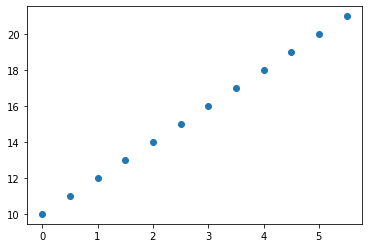

In [1]:
# Реализуем простой пример линейной регрессии, с одной зависимой переменной У, и одной независимой переменной х.
# Создадим данные. Зависимость будет такой: y = 2*x + 10
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.array([[x] for x in np.arange(0.0, 6.0, 0.5)])
y = np.array([[2*x[0] + 10] for x in x.tolist()])

plt.scatter(x, y)
plt.show()

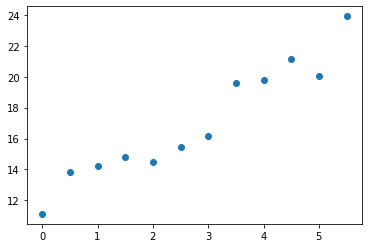

In [77]:
# Сейчас у нас строго линейная зависимость. Добавим немного шума, используя метод np.random.rand

np.random.seed(42)

x = np.array([[x] for x in np.arange(0.0, 6.0, 0.5)])
y = np.array([[2*x[0] + 10 + np.random.rand()*3] for x in x.tolist()])
plt.scatter(x, y)
plt.show()

In [3]:
# Посмотрим на сами данные
print(x)
print(y)

[[0. ]
 [0.5]
 [1. ]
 [1.5]
 [2. ]
 [2.5]
 [3. ]
 [3.5]
 [4. ]
 [4.5]
 [5. ]
 [5.5]]
[[11.12362036]
 [13.85214292]
 [14.19598183]
 [14.79597545]
 [14.46805592]
 [15.46798356]
 [16.17425084]
 [19.59852844]
 [19.80334504]
 [21.12421773]
 [20.06175348]
 [23.90972956]]


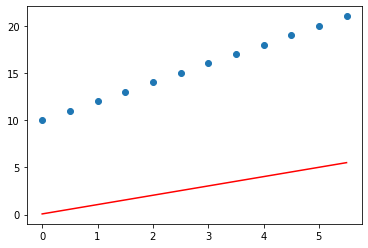

In [89]:
# Объявим параметры: веса и шаг градиентного спуска

w0 = np.random.rand()
w1 = np.random.rand()
step = 0.008

# Как видно, случайно инициализированные веса не очень хорошо приблизили линейную зависимость.
# Точнее вообще никак не приблизили
plt.scatter(x, y)
plt.plot(x, x*w1 + w0, c='red')

(3.9111429313689206, 4.406649763428221)

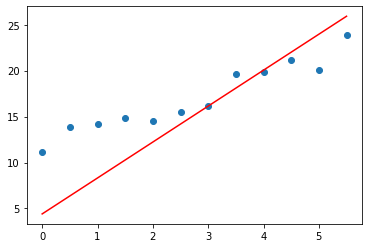

In [118]:
# Реализуем само обучение
# Число шагов для обучения установим в 30

for i in range(30):
    
    # Предсказание
    pred = x*w1 + w0
    
    # MSE-loss
    loss = np.sum((y - pred)**2)/x.shape[0]
    
    # шаг для каждого из весов
    w1 = w1 - step*np.sum((pred - y) * x) * 2 / x.shape[0]
    w0 = w0 - step*np.sum(pred - y) * 2 / x.shape[0]
    
    # Критерий остановки обучения:
    # разница между значениями MSE меньше, чем на 0.01
    # Вычтем из старого значения лосс-функции новое, полученное уже после обновления весов. 
    if np.abs(loss - np.sum((x*w1 + w0 - y)**2) / x.shape[0]) < 0.01:
        print(loss)
        break
        

# Теперь красная линия приближает данные лучше.        
plt.scatter(x, y)
plt.plot(x, x*w1 + w0, c='red')

w1, w0

Задание
Реализовать модели линейной регрессии в виде класса, способного работать как с одномерным набором признаков(как в примере выше), так и с многомерным (когда у нас есть x_1, x_2 и тд).
Веса желательно задать в виде вектора, X преобразовать, добавив в начало единицу (см. теорию).
Используйте возможности библиотеки numpy (например, при использовании матриц, пользуйтесь np.dot, np.transpose).

In [88]:
class linReg:
    def __init__(self, lr = 0.0001, iters = 5000):
        self.lr = lr
        self.iters = iters

    def fit(self, x, y):
        x = np.hstack((np.ones(len(x)).reshape(-1,1),x))
        self.w = np.random.randint(10,30,x.shape[1])
        for i in range(self.iters):
            pred = np.dot(x,self.w)
            
            loss = np.sum((y - pred)**2)/x.shape[0]
            
            w_i = []
            for j in range(len(self.w)):
                t = self.w[j] - self.lr * np.sum((pred-y)*x[:,j])*2/x.shape[0]
                w_i.append(t)
            self.w = np.array(w_i)
            if abs(loss - np.sum((np.dot(x,self.w)-y)**2)/x.shape[0]) < 0.01:
                print(loss)
                break
    def predict(self, x):
        x = np.hstack((np.ones(len(x)).reshape(-1,1),x))
        return np.dot(x,self.w)

2.6710146872303966


array([9.29609015, 2.73224141])

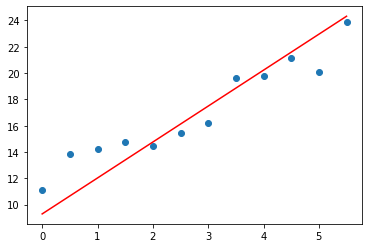

In [80]:
from sklearn.datasets import make_regression
from matplotlib import pyplot as plt
np.random.seed(42)

linRegInstance = linReg(iters=3000, lr=0.001)
linRegInstance.fit(x, y.reshape(y.shape[0]))
pred = linRegInstance.predict(x)

plt.scatter(x, y)
plt.plot(x, pred, c='red')

linRegInstance.w

In [37]:
# Проверим размерности
assert pred.shape == np.array(y.reshape(12)).shape

In [39]:
import pandas as pd

In [43]:
data = pd.read_csv('C:\\Users\\Ильнар\\Мои алгоритмы\\train.csv')

In [44]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


Взглянем на распределение признаков, используя графики из библиотеки seaborn.
По сути, seaborn это некая обертка над matplotlib, позволяющая строить чуть более красивые графики.

Сейчас нам понадобится kdeplot.
Данный график показывает распределение плотности случайной величины, за которую мы берем столбец таблицы.

<AxesSubplot:xlabel='temp', ylabel='Density'>

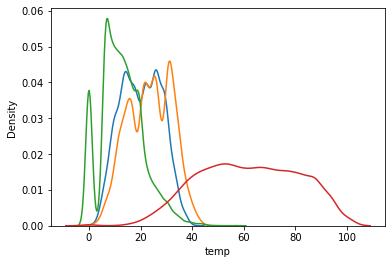

In [48]:
import seaborn as sns

sns.kdeplot(data['temp'])
sns.kdeplot(data['atemp'])
sns.kdeplot(data['windspeed'])
sns.kdeplot(data['humidity'])

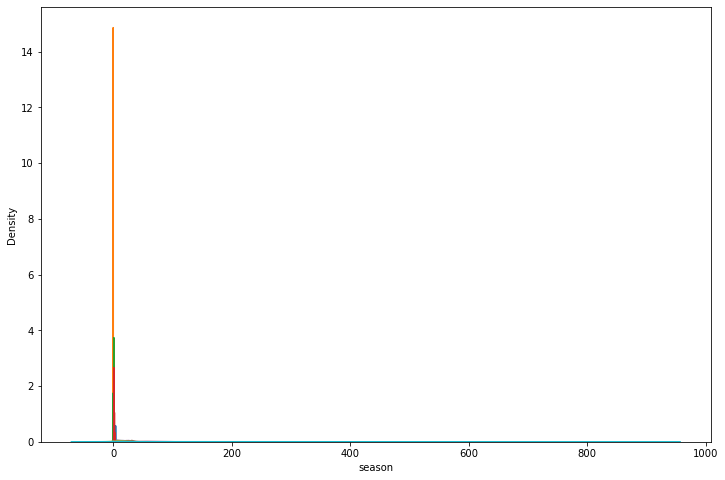

In [52]:
plt.figure(figsize=(12,8))
for i in data.drop(['count','datetime'], axis=1).columns:
    sns.kdeplot(data[i])

Hапишем небольшую реализацию StandardScaler. Суть его работы проста: все приводится к нулевому среднему значению, и единичному отклонению.
Формула:
 
x = x-mean(x)/std(x)

где mean - среднее, std - среднеквадратичное отклонение.
Соответсвенно после масштабирования Mean(X) = 0 и Std(X) = 0

In [57]:
def StandardScaler(x):
    mean = x - np.mean(x)
    
    return mean/np.std(x)

In [82]:
# разобьем выборку на целевые и нецелевые признаки
x = data.drop(['count','datetime'], axis=1)
y = data['count']

In [83]:
x_scaled = StandardScaler(x)
x_scaled

C:\python\__pycache__\envs\dsfs\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered
0,-1.349864,-0.17149,-1.460672,-0.660178,-1.333661,-1.092737,0.993213,-1.567754,-0.660992,-0.943854
1,-1.349864,-0.17149,-1.460672,-0.660178,-1.438907,-1.182421,0.941249,-1.567754,-0.560908,-0.818052
2,-1.349864,-0.17149,-1.460672,-0.660178,-1.438907,-1.182421,0.941249,-1.567754,-0.620958,-0.851158
3,-1.349864,-0.17149,-1.460672,-0.660178,-1.333661,-1.092737,0.681430,-1.567754,-0.660992,-0.963717
4,-1.349864,-0.17149,-1.460672,-0.660178,-1.333661,-1.092737,0.681430,-1.567754,-0.721042,-1.023307
...,...,...,...,...,...,...,...,...,...,...
10881,1.338012,-0.17149,0.684616,-0.660178,-0.596935,-0.467310,-0.617666,1.617227,-0.580925,1.148417
10882,1.338012,-0.17149,0.684616,-0.660178,-0.702182,-0.735182,-0.253919,0.269704,-0.520875,0.499548
10883,1.338012,-0.17149,0.684616,-0.660178,-0.807428,-0.913959,-0.046064,0.269704,-0.640975,0.055934
10884,1.338012,-0.17149,0.684616,-0.660178,-0.807428,-0.735182,-0.046064,-0.832442,-0.480841,-0.255258


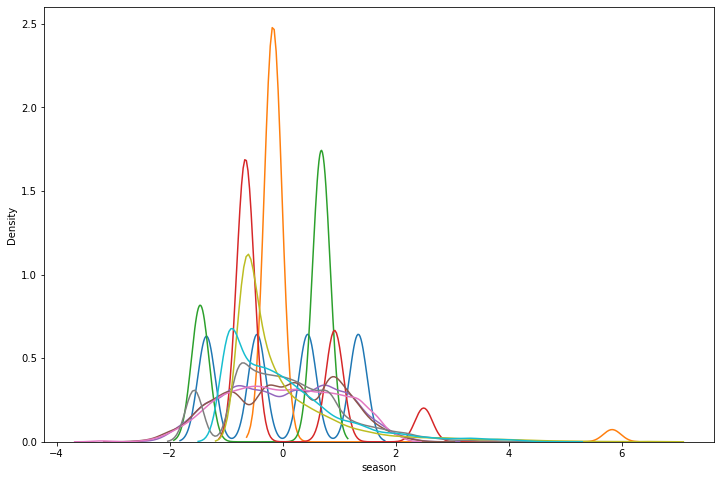

In [59]:
# Видно, что признаки теперь имеют одинаковый масштаб, и их распределение похоже на нормальное.
plt.figure(figsize=(12,8))
for i in x_scaled.columns:
    sns.kdeplot(x_scaled[i])

Проверим среднее и отклонение. Поле values классов DataFrame или Series вернет numpy-массив.

In [84]:
print(np.mean(x_scaled.values))
np.std(x_scaled.values)

-3.16957149076892e-15


1.000000000000001

In [85]:
# переименуем переменные для удобства,
# и превратим данные в numpy-массивы.
x = x_scaled.values
y = y.values


model = linReg(iters=5000, lr=0.001)
model.fit(x, y)
pred = model.predict(x)

6.6494726855446


In [86]:
assert pred.shape == y.shape, "Неправильные размеры"

In [ ]:
Оценка за задание высчитывается следующим образом исходя из RSS и TSS:

Собственно, точно так же оценивается качество линейной регрессии в библиотеке sklearn.

Если Ваш total score  выше либо равен 0.79, то оценка - 100 баллов.
Если Ваш total score  выше либо равен 0.69, то оценка - 85 баллов
Если Ваш total score  выше либо равен 0.55, то оценка - 70 баллов
Если Ваш total score  выше 0.5, то оценка - 40 баллов.
Если Ваш total score  равен либо ниже 0.5, то оценка - 0 баллов.

In [87]:
RSS = ((y - pred) ** 2).sum()
TSS = ((y - y.mean()) ** 2).sum()

score = 1-RSS/TSS
print(f'Оценка {100 if score >= 0.79 else (85 if score >= 0.69 else (70 if score >= 0.55 else (40 if score > 0.5 else 0)))} баллов')

Оценка 100 баллов


In [89]:
# сравним нашу реализацию с реализацией из Sklearn
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x, y)
pred_lib = model.predict(x)

RSS = ((y - pred_lib) ** 2).sum()
TSS = ((y - y.mean()) ** 2).sum()

score_lib = 1-RSS/TSS
score_lib, score, model.score(x, y)

(1.0, 0.9997976405352919, 1.0)

Вопросы

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy
%matplotlib inline

In [2]:
df = pd.read_csv('C:\\Users\\Ильнар\\Мои алгоритмы\\train_kv.csv', index_col='Id')
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
assert df.shape == (1460, 80)

In [5]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

Задание:

  Нарисуйте график распределения SalePrice, используйте аргумент fit=scipy.stats.norm, чтобы нарисовать предполагаемое нормальное распределение. Напечатайте значение коэффициент эксцесса kurtosis для этого признака.
  Нарисуйте график scipy.stats.probplot - он покажет нам реальные квантили выборки и теоретические. По нему можно видеть, на сколько много выьросов и на сколько выборка предсказуема.
  Что вы можете сказать по поводу выборки основываясь на probplot. wiki

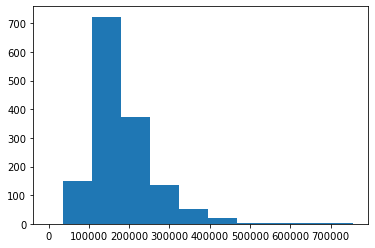

In [3]:
plt.hist(df.SalePrice)

x = np.linspace(scipy.stats.norm.ppf(0.01),
                scipy.stats.norm.ppf(0.99), 100)
plt.plot(x, scipy.stats.norm.pdf(x),
       'r-', lw=5, alpha=0.6, label='norm pdf')

In [4]:
kurt = scipy.stats.kurtosis(df.SalePrice)

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000], dtype=int64)),
 (74160.16474519417, 180921.19589041095, 0.9319665641512986))

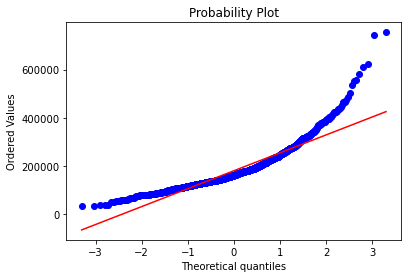

In [5]:
scipy.stats.probplot(df.SalePrice,plot=plt)

У нас очень много разных признаков. Любопытно построить разные графики. Позаботьтесь о красоте и наглядности графиков, сделайте так, чтобы они были большими и их можно было прочесть. Даже подписи на графиках должны быть читаемые!!

Задания: Постройте графики, отражающие зависимости этих признаков:

     дата постройки дома и его стоимости
     "качество дома и материалов" и его стоимости
     площадь дома и стоимость

NameError: name 'df_t' is not defined

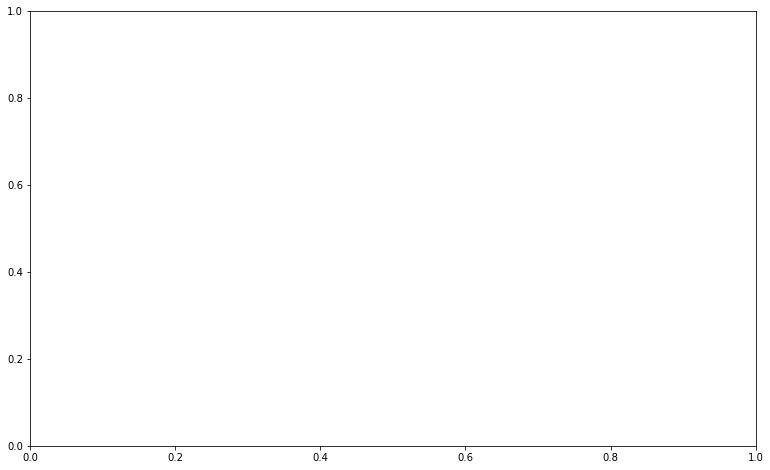

In [6]:
# дата постройки дома и его стоимости

figure = plt.figure(figsize=(13,8))
ax = plt.subplot()

df_m = df.MoSold.astype('str')
df_y = df.YrSold.astype('str')

df_v = pd.DataFrame(pd.to_datetime(df_y + '-' + df_t, format='%Y-%m'),columns=['vremya'])

df_v['price'] = df.SalePrice
sorted_df = df_v.sort_values('vremya')

ax.plot(sorted_df.vremya,sorted_df.price)
plt.xlabel('Время')
plt.ylabel('Стоимость')
plt.title('Зависимость стоимости квартиры от времени')

In [ ]:
sns.jointplot(x='YearBuilt',y='SalePrice',data=df)

<Figure size 1080x720 with 0 Axes>

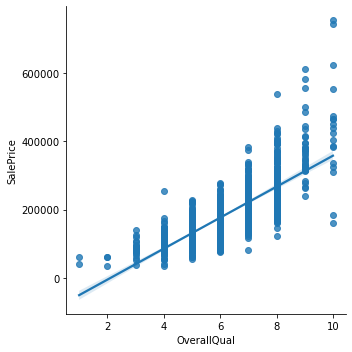

In [14]:
# "качество дома и материалов" и его стоимости
sns.lmplot(x='OverallQual',y='SalePrice',data=df)


Судя по предыдущим графикам, есть некоторые линейные зависимости. Но строить по графику на каждый признак из 80 штук немного долго и не наглядно. Постройте красивый график корреляции всех признаков. Используйте цвета RdYlGn, так будет нагляднее. Не забудьте применить маску, чтобы убрать дублирующую половину матрицы.

<AxesSubplot:>

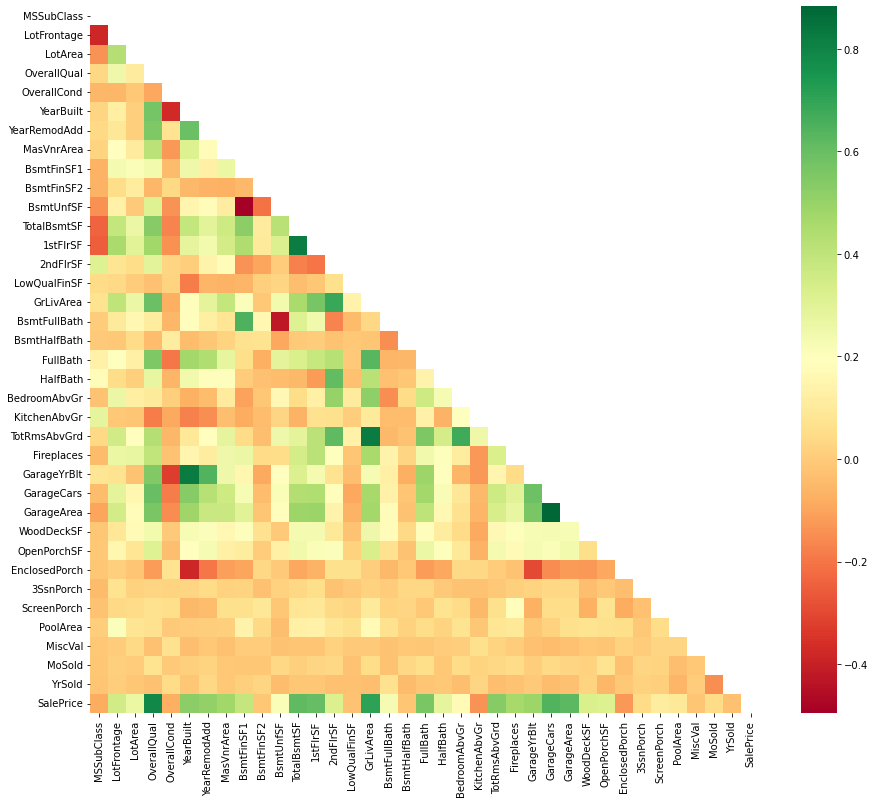

In [34]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f,ax = plt.subplots(figsize=(15,13))

sns.heatmap(data=corr,cmap='RdYlGn',mask=mask)

In [56]:
corr.


Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

Задание:

  Посчитайте общее количество пропущенных данных по каждому признаку
  посчитайте долю пропущенных данных выборки
  удалите из выборки признаки, доля пропущенных которых больще 10%
  пропущенные категориальные заполните словом 'unknown' (у них dtype object)
  пропущенные числовые заполните средним (у них dtype float)

In [82]:
lost_n = df.isnull().sum()
dol_l = lost_n.apply(lambda x: x/df.shape[0])

df_non = df[df.columns[dol_l < 0.1]]


In [126]:
# пропущенные категориальные заполните словом 'unknown' (у них dtype object)
# пропущенные числовые заполните средним (у них dtype float)
for i in df_non.columns:
    if df_non[i].dtype == object:
        df_non[i] = df_non[i].fillna('unknown')
    else:
        df_non[i] = df_non[i].fillna(np.mean(df_non[i]))

C:\Users\Ильнар\AppData\Local\Temp\ipykernel_10780\221879752.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non[i] = df_non[i].fillna(np.mean(df_non[i]))
C:\Users\Ильнар\AppData\Local\Temp\ipykernel_10780\221879752.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non[i] = df_non[i].fillna('unknown')


На сколько вы помните, линейная регрессия не умеет обрабатывать категориальные признаки, так как ей нужны ЧИСЛА. Но не беда, в pandas есть встроенная функция get_dummies.

Задание:

сконвертируйте все категориальные признаки(dtype=object) в вектора числовых с помощью get_dummies
напечатайте сколько у вас теперь признаков
Положите в переменную X все данные из датасета, кроме целевой переменной. Положите в переменную y только целевую переменную.

In [140]:
columns = []
for i in df_non.columns:
    if df_non[i].dtype == object:
        columns.append(i)

In [186]:
df_dimmed = pd.get_dummies(df_non,columns=columns)
df_dimmed = df_dimmed.reset_index()

Обучим обычную модель без регуляризации sklearn.linear_model.LinearRegression.

Выведите все коэффициенты для каждого признака, отсортировав по возрастанию по модулю значения коэффициента. Используйте print и for, иначе jupyter схлопнет вывод numpy массива. Можете округлить коэффициенты до 2 знаков после запятой.
Выведите среднее ошибки предсказания на 5 фолдах (cv=5) для этой линейной регрессии с помощью функции sklearn.model_selection.cross_val_score. Укажите scoring='neg_mean_squared_error', чтобы считалась MSE

In [188]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


X = df_dimmed.drop(['SalePrice','Id'],axis=1)
y = df_dimmed.SalePrice

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33)

In [293]:
from sklearn.model_selection import cross_val_score
clf = LinearRegression()
clf.fit(X_train,y_train)



LinearRegression()

In [192]:
for i in np.sort(np.abs(clf.coef_)):
    print(round(i,2))

0.0
0.0
0.0
0.08
0.37
0.79
1.03
7.73
12.92
14.86
16.65
18.97
19.19
32.9
69.27
92.69
96.83
131.4
245.09
297.31
718.32
998.29
2250.19
2311.6
3555.77
4024.64
4136.02
5495.32
6102.4
8007.27
14095.56
68843.39
163691.55
1088551.36
4988844.12
39304791.66
80090644.03
111554937.49
111575831.28
111588014.63
111592388.57
111602331.17
111608228.76
111615190.49
111616530.34
111616801.43
164673209.57
290492569.05
290498622.74
290501227.22
290528855.47
384988154.42
384990160.74
384992511.56
384992521.57
384996761.01
385009810.25
530008353.2
530010797.33
530012928.34
530025236.98
530029249.7
530030583.02
530033247.59
530036943.22
530039194.89
1070460771.54
1070464355.04
1070468036.78
1070474363.07
1070483206.74
1070485391.8
1070542380.11
1268546323.25
1268554065.78
1268573034.55
1268574333.63
1268796483.15
1336902347.46
1336903619.04
1336907599.87
1336920729.29
1336921876.72
1336924808.17
1336925363.5
1336926465.67
1336928640.59
1336930244.5
1336930756.65
1336937146.42
1337015941.37
1358533081.07
1359

In [294]:
pred_y = clf.predict(X_train)
np.mean(cross_val_score(clf,X_train,y_train,cv=5,scoring='neg_mean_squared_error'))

-3.88777830757323e+18

Обучите Lasso и Ridge для разных значений регуляризации alpha
нарисуйте график значений коэффициентов модели для каждого признака, как мы делали на практике. По оси X будет значение alpha, по Y - значение коэффициента. на графике будет "радуга" из линий разных цветов(линий столько, сколько признаков).
Нарисуйте гистограмму, в которой по оси Y будет количество коэффициентов, равных 0 (<0.0001) для Loss регресиии, а по оси X - значение коэффициента альфа.
alpha взять от 1 до 500 с каким-нибудь шагом. Но не переборщите, а то долго будете ждать.

In [204]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

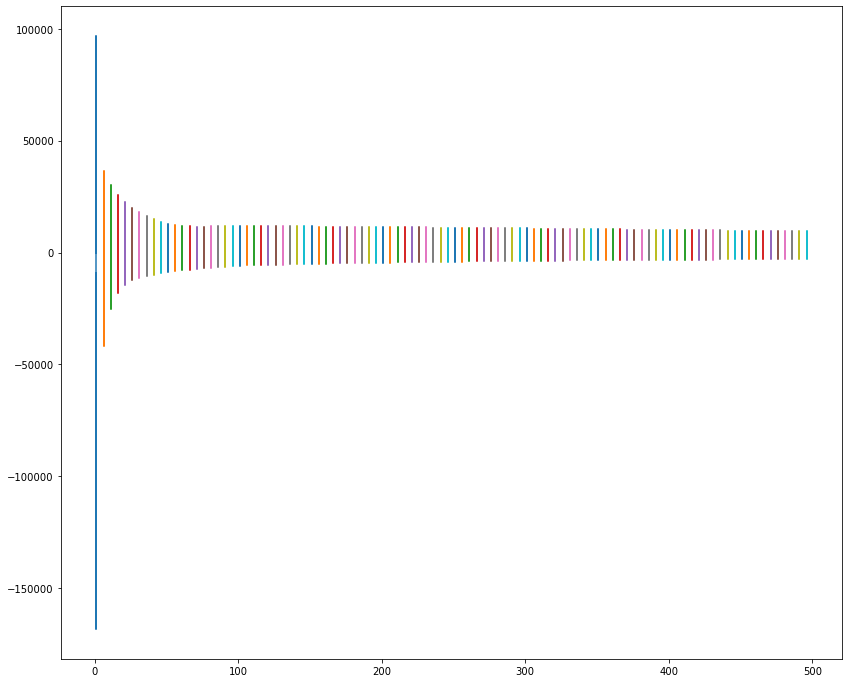

In [226]:
f,ax = plt.subplots(figsize=(14,12))

for i in range(1,500,5):
    clf_r = Ridge(alpha=i)
    clf_r.fit(X_train,y_train)
    ax.plot(np.repeat(i,clf_r.coef_.shape[0]),clf_r.coef_)


C:\python\__pycache__\envs\dsfs\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.961e+11, tolerance: 6.172e+08
  model = cd_fast.enet_coordinate_descent(


(array([1., 0., 0., 0., 0., 1., 0., 1., 3., 4.]),
 array([ 40. ,  57.7,  75.4,  93.1, 110.8, 128.5, 146.2, 163.9, 181.6,
        199.3, 217. ]),
 <BarContainer object of 10 artists>)

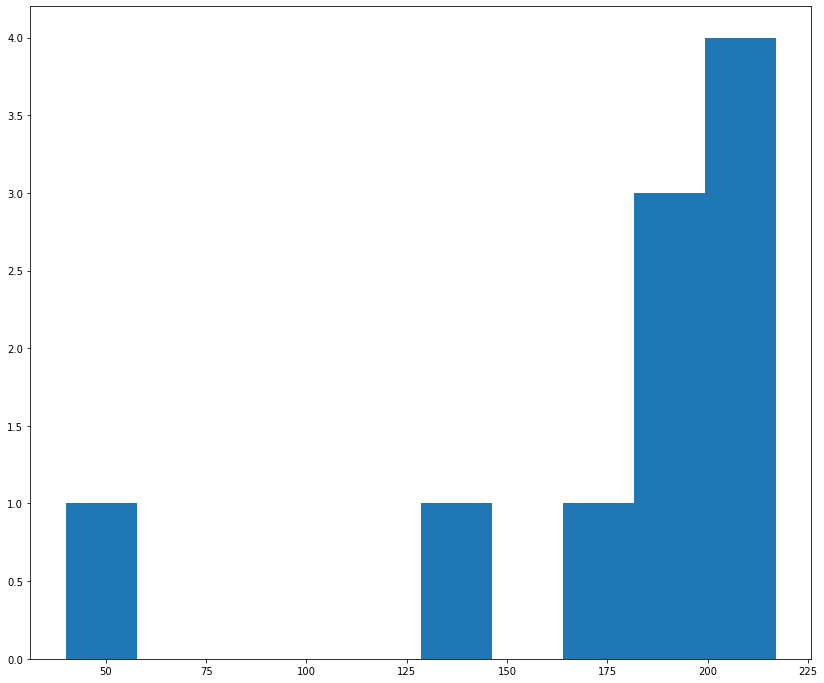

In [275]:
f,ax = plt.subplots(figsize=(14,12))

ls = []
for i in range(1,500,50):
    clf_l = Lasso(alpha=i)
    clf_l.fit(X_train,y_train)
    ls.append(np.sum(clf_l.coef_==0))

plt.hist(ls)

С помощью метода LassoCV найдите оптимальное значение alpha и напечатайте его, используя разбиение на 5 фолда в кроссвалидации (cv=5).
Нарисуйте график зависимости MSE от alpha (mse_path_).
Нарисуйте длинную гистограмму магнитуда признаков, как в классе, на которой будет показано значение коэффициента для каждого признака. Графк должен быть остортирован по величине коэффициентов. Признаки с нулевыми коэффициентами должны быть удалены.
Сколько в итоге ненулевых признаков осталось?
Выведите среднее ошибки предсказания на 5 фолдах (cv=5) для этой линейной регрессии с помощью функции sklearn.model_selection.cross_val_score. Укажите scoring='neg_mean_squared_error', чтобы считалась MSE. Качество должно быть лучше, чем у простой линейной регрессии.

In [234]:
from sklearn.linear_model import LassoCV

In [236]:
clf_l_c = LassoCV(cv=5,alphas=[i for i in range(1,500,10)])
clf_l_c.fit(X_train,y_train)

C:\python\__pycache__\envs\dsfs\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 711582285.6090698, tolerance: 511682504.6879924
  model = cd_fast.enet_coordinate_descent_gram(
C:\python\__pycache__\envs\dsfs\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 99466977727.27367, tolerance: 436576659.1454691
  model = cd_fast.enet_coordinate_descent_gram(
C:\python\__pycache__\envs\dsfs\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 136373113162.67047, tolerance: 513340815.9755668
  model = cd_fast.enet_coordinate_descent_gram(
C:\python\__pycache__\envs\dsfs\lib\site-packages\sklearn\linear_model\_

LassoCV(alphas=[1, 11, 21, 31, 41, 51, 61, 71, 81, 91, 101, 111, 121, 131, 141,
                151, 161, 171, 181, 191, 201, 211, 221, 231, 241, 251, 261, 271,
                281, 291, ...],
        cv=5)

Text(0, 0.5, 'Среднее значение MSE')

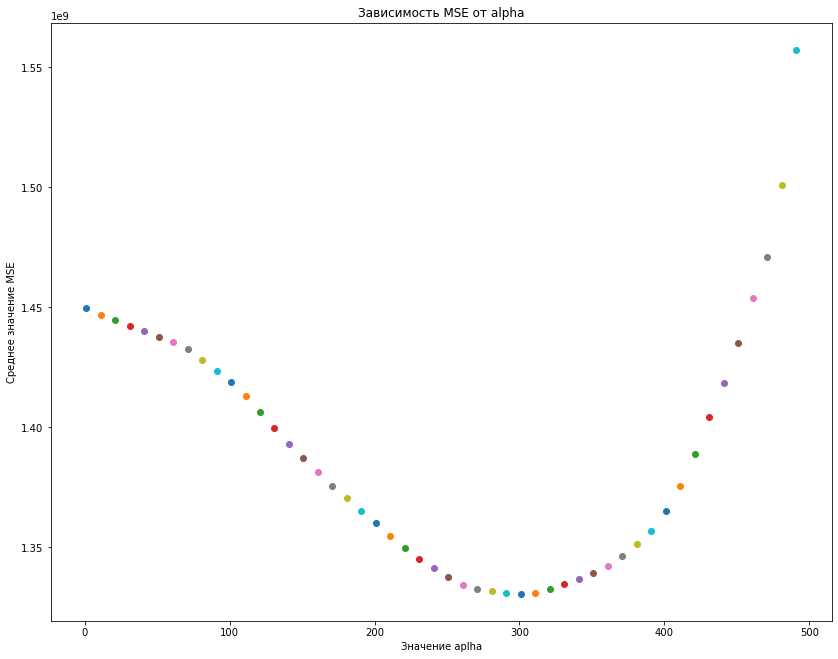

In [296]:
f,ax = plt.subplots(figsize=(14,11))
alph = [i for i in range(1,500,10)]
for i in range(len(alph)):
    ax.scatter(alph[i],np.mean(clf_l_c.mse_path_[i]))
plt.title('Зависимость MSE от alpha')
plt.xlabel('Значение aplha')
plt.ylabel("Среднее значение MSE")

In [283]:
arr_c = np.array(clf_l_c.coef_)

In [289]:
np.sort(arr_c[arr_c!=0])

array([-2.84897767e+05, -7.90701597e+04, -8.48813146e+03, -7.99351100e+03,
       -7.08073253e+03, -5.94041661e+03, -5.30934326e+03, -4.93090253e+03,
       -4.67265272e+03, -3.92958308e+03, -3.91067435e+03, -3.88404665e+03,
       -3.32269923e+03, -3.12113066e+03, -2.92762705e+03, -2.71459318e+03,
       -2.45758960e+03, -8.81096719e+02, -8.12632438e+02, -6.02709487e+02,
       -5.17280462e+02, -4.89906950e+02, -4.08213765e+02, -3.95472912e+02,
       -1.84433816e+02, -1.97963939e+01, -1.62156341e+01, -7.87057831e+00,
       -3.38425924e-01,  2.46704626e-11,  6.87094670e-02,  2.97937671e+00,
        4.07065850e+00,  4.34170923e+00,  4.85524964e+00,  5.99207837e+00,
        8.56119506e+00,  1.04782707e+01,  1.10204798e+01,  1.15073361e+01,
        1.23616552e+01,  1.82133970e+01,  2.05221136e+01,  3.24307031e+01,
        3.76447640e+01,  5.03048620e+01,  5.52623771e+01,  5.57233006e+01,
        1.20447276e+02,  2.85290242e+02,  2.91409949e+02,  1.11787253e+03,
        1.18899216e+03,  

In [291]:
np.mean(cross_val_score(clf_l_c,X_train,y_train,cv=5,scoring='neg_mean_squared_error'))

C:\python\__pycache__\envs\dsfs\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 76010657587.05939, tolerance: 378032108.97096246
  model = cd_fast.enet_coordinate_descent_gram(
C:\python\__pycache__\envs\dsfs\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 528841108.7011719, tolerance: 409286257.6705257
  model = cd_fast.enet_coordinate_descent_gram(
C:\python\__pycache__\envs\dsfs\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2452719685.33374, tolerance: 429040681.94448763
  model = cd_fast.enet_coordinate_descent_gram(
C:\python\__pycache__\envs\dsfs\lib\site-packages\sklearn\linear_model\_

-1363119763.9955568

Теперь, возьмите вашу самую мощную модель(не тренированную!). Запустите её тренировку по тренировочной выборке X_train, y_train с помощью функции fit. Постройте предсказания с помощью функции predict.

In [297]:
best_clf = Lasso(alpha=300)
best_clf.fit(X_train,y_train)

Lasso(alpha=300)

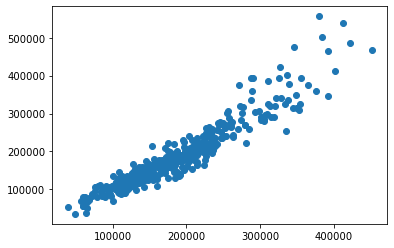

In [298]:
pred = best_clf.predict(X_test)
plt.scatter(pred,y_test)

Помните в самом начале мы оставили очень мало признаков по данным из heatmap. Настало время проверить как он себя покажет! К счастью они все сразу числовые, а не категориальные. Переиспользуйте тот дадасет, где вы уже поборолись с пропусками. Снова выделите отдельно X и y и запустите кроссвалидацию c 5 фолдами по Lasso с alpha=1.

In [302]:
clf = Lasso(alpha=1)

clf.fit(X,y)

C:\python\__pycache__\envs\dsfs\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.349e+11, tolerance: 9.208e+08
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=1)

In [304]:
np.mean(cross_val_score(clf,X,y,cv=5,scoring='neg_mean_squared_error'))

C:\python\__pycache__\envs\dsfs\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.855e+11, tolerance: 7.592e+08
  model = cd_fast.enet_coordinate_descent(
C:\python\__pycache__\envs\dsfs\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.270e+10, tolerance: 7.288e+08
  model = cd_fast.enet_coordinate_descent(
C:\python\__pycache__\envs\dsfs\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap

-1167270809.3507915